## Package imports

In [1]:
import os
import numpy as np
import pandas as pd

## Display settings

In [2]:
pd.set_option('display.width', 140)

## Reading in the data

In [3]:
RETAIL = "../data/raw/Retail data.csv"
POTENTIAL_CUSTOMERS = "../data/raw/Potential Customers.csv"

In [4]:
data_path = RETAIL
# data_path = POTENTIAL_CUSTOMERS

In [5]:
df = pd.read_csv(data_path, sep=";")

## Cleaning the data

### Removing redundant columns

In [6]:
df.drop("Cocunut", axis=1, inplace=True)

### Giving some columns more descriptive names

In [7]:
column_names = {
    "MARTIAL_STATUS": "MARITAL_STATUS",
    "CUST_INCOME": "INCOME",
    "CURRENT_ADDRESS_DATE": "ADDRESS_DATE",
    "CURRENT_JOB_DATE": "JOB_DATE",
    "CURRENT_WITH_BANK_DATE": "WITH_BANK_DATE",
    "CURRENT_BALANCE_EUR": "BALANCE"
}

if data_path == RETAIL:
    column_names["Mortgage_YN"] = "MORTGAGE"
    column_names["AGE_AT_ORIGINATION"] = "MORTGAGE_GETTING_AGE"

df.rename(columns=column_names, inplace=True)

### Setting unknown marital statuses as NaN (Not a Number)

In [8]:
df.loc[df["MARITAL_STATUS"] == "*noval*", "MARITAL_STATUS"] = np.NaN

### Setting correct column data types

In [9]:
# Set categorical columns

categorical_columns = [
    "MARITAL_STATUS",
    "EDUCATION",
    "EMPLOYMENT",
    "GENDER",
]

df[categorical_columns] = df[categorical_columns].astype("category")

In [10]:
# Set date columns while also setting invalid dates to NaT (Not a Time)

date_columns = [
    "ADDRESS_DATE",
    "JOB_DATE",
    "WITH_BANK_DATE",
]

df[date_columns] = df[date_columns].apply(pd.to_datetime, errors="coerce")

In [11]:
# Set monetary columns

monetary_columns = [
    "BALANCE",
    "INCOME",
]

def convert_to_eur(value: pd.Series) -> pd.Series:
    return value.str.replace(",", ".").astype(float).round(2)

df[monetary_columns] = df[monetary_columns].apply(convert_to_eur)

In [12]:
# Also set correct data types for the retail specific columns
if data_path == RETAIL:

    # Set mortgage column type as a categorical
    df["MORTGAGE"] = df["MORTGAGE"].astype("category")

    # Set mortgage getting age column type as nullable integer
    df["MORTGAGE_GETTING_AGE"] = df["MORTGAGE_GETTING_AGE"].astype("Int64")

### Setting future dates as NaT (Not a Time)

In [13]:
today = pd.to_datetime("today")

for column in date_columns:
    df.loc[df[column] > today, column] = pd.NaT

### Taking a look at the cleaned data

In [14]:
# First 5 rows
df.head()

,MORTGAGE,MORTGAGE_GETTING_AGE,AGE,YEARS_WITH_BANK,MARITAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,INCOME,ADDRESS_DATE,JOB_DATE,WITH_BANK_DATE,BALANCE
0,Y,50,52,13,M,HGH,PVE,M,909.50,1979-04-18,2010-01-01,2004-03-16,7648.35
1,Y,48,49,11,M,HGH,SFE,M,288.46,1999-12-16,2004-01-20,2005-11-07,30189.90
2,Y,53,55,14,M,BCR,STE,M,1280.53,2005-06-28,1990-09-01,2003-06-25,50553.17
3,Y,64,66,10,M,BCR,OTH,F,620.96,2000-12-22,NaT,2006-12-21,15907.28
4,Y,46,47,9,S,MAS,PVE,F,2239.85,2009-08-01,2013-12-24,2007-08-07,27916.19


In [15]:
# Last 5 rows
df.tail()

,MORTGAGE,MORTGAGE_GETTING_AGE,AGE,YEARS_WITH_BANK,MARITAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,INCOME,ADDRESS_DATE,JOB_DATE,WITH_BANK_DATE,BALANCE
23978,N,<NA>,67,3,M,BCR,RET,M,179.22,1999-03-10,NaT,2014-06-02,781.19
23979,N,<NA>,59,13,M,HGH,PVE,F,690.10,1997-01-01,2004-01-01,2004-01-12,13716.37
23980,N,<NA>,68,7,W,PRS,RET,M,255.95,1949-10-27,NaT,2009-12-01,1066.28
23981,N,<NA>,59,2,M,BCR,STE,M,459.32,2003-04-01,2008-09-24,2015-04-23,4577.40
23982,N,<NA>,47,1,M,HGH,STE,F,528.77,2010-01-01,2005-03-23,2016-06-06,2307.69


In [16]:
# Numeric column statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
MORTGAGE_GETTING_AGE,306.0,41.333333,22.0,35.0,40.0,47.75,64.0,8.970992
AGE,23983.0,49.004378,20.0,39.0,49.0,60.0,92.0,12.976205
YEARS_WITH_BANK,23983.0,7.370804,0.0,3.0,9.0,11.0,40.0,4.320568
INCOME,23983.0,381.51249,0.0,212.305,287.36,406.1,25741.92,486.25544
ADDRESS_DATE,23775,1991-10-27 19:48:24.075709696,1925-04-04 00:00:00,1980-06-29 00:00:00,1993-07-21 00:00:00,2005-10-28 00:00:00,2016-08-26 00:00:00,NaN
JOB_DATE,18212,2005-10-06 03:20:02.635624960,1970-01-21 00:00:00,2001-02-24 18:00:00,2008-01-14 00:00:00,2013-01-15 00:00:00,2016-10-02 00:00:00,NaN
WITH_BANK_DATE,23983,2009-08-11 23:04:49.254888960,1976-07-17 00:00:00,2005-09-13 00:00:00,2008-06-20 00:00:00,2013-11-05 00:00:00,2016-10-05 00:00:00,NaN
BALANCE,23983.0,1960.854494,0.0,107.675,428.07,2307.69,187940.65,5023.23466


In [17]:
# Categorical column statistics
df.describe(include=["category"]).T

,count,unique,top,freq
MORTGAGE,23983,2,N,23677
MARITAL_STATUS,23940,4,M,17024
EDUCATION,23983,8,HGH,15987
EMPLOYMENT,23983,5,PVE,10743
GENDER,23983,2,F,12105


In [18]:
# Unique categories
for column in categorical_columns:
    print(f"{column}: {df[column].unique().tolist()}")

MARITAL_STATUS: ['M', 'S', nan, 'D', 'W']
EDUCATION: ['HGH', 'BCR', 'MAS', 'SEC', 'PHD', 'PRS', 'PRI', 'OTH']
EMPLOYMENT: ['PVE', 'SFE', 'STE', 'OTH', 'RET']
GENDER: ['M', 'F']


In [19]:
# Feature overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MORTGAGE              23983 non-null  category      
 1   MORTGAGE_GETTING_AGE  306 non-null    Int64         
 2   AGE                   23983 non-null  int64         
 3   YEARS_WITH_BANK       23983 non-null  int64         
 4   MARITAL_STATUS        23940 non-null  category      
 5   EDUCATION             23983 non-null  category      
 6   EMPLOYMENT            23983 non-null  category      
 7   GENDER                23983 non-null  category      
 8   INCOME                23983 non-null  float64       
 9   ADDRESS_DATE          23775 non-null  datetime64[ns]
 10  JOB_DATE              18212 non-null  datetime64[ns]
 11  WITH_BANK_DATE        23983 non-null  datetime64[ns]
 12  BALANCE               23983 non-null  float64       
dtypes: Int64(1), cat

In [20]:
# Number of missing values in each column
df.isna().sum()

MORTGAGE                    0
MORTGAGE_GETTING_AGE    23677
AGE                         0
YEARS_WITH_BANK             0
MARITAL_STATUS             43
EDUCATION                   0
EMPLOYMENT                  0
GENDER                      0
INCOME                      0
ADDRESS_DATE              208
JOB_DATE                 5771
WITH_BANK_DATE              0
BALANCE                     0
dtype: int64

In [21]:
# Ratio of missing values in each column
df.isna().mean().round(4)

MORTGAGE                0.0000
MORTGAGE_GETTING_AGE    0.9872
AGE                     0.0000
YEARS_WITH_BANK         0.0000
MARITAL_STATUS          0.0018
EDUCATION               0.0000
EMPLOYMENT              0.0000
GENDER                  0.0000
INCOME                  0.0000
ADDRESS_DATE            0.0087
JOB_DATE                0.2406
WITH_BANK_DATE          0.0000
BALANCE                 0.0000
dtype: float64

### Taking a look at the value distribution of each column

<Axes: title={'center': 'Age distribution'}, xlabel='Age', ylabel='Count'>

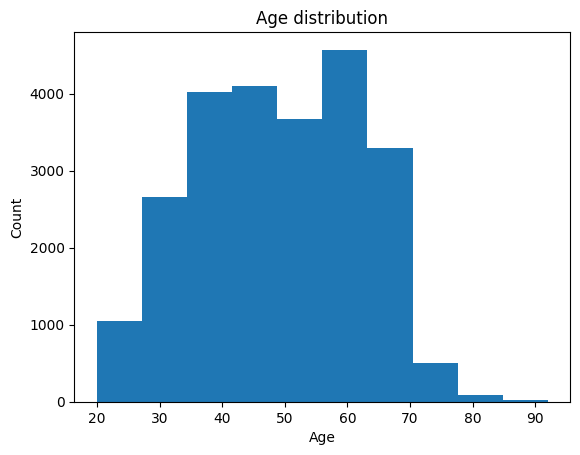

In [22]:
df["AGE"].plot(kind="hist", title="Age distribution", xlabel="Age", ylabel="Count")

<Axes: title={'center': 'Years with bank distribution'}, xlabel='Years with bank', ylabel='Count'>

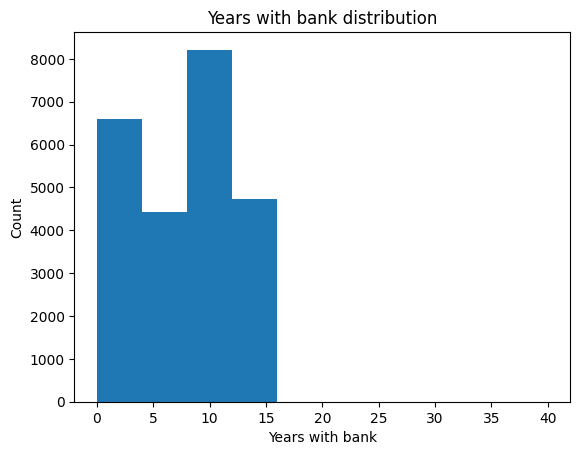

In [23]:
df["YEARS_WITH_BANK"].plot(kind="hist", title="Years with bank distribution", xlabel="Years with bank", ylabel="Count")

<Axes: title={'center': 'Marital status distribution'}, xlabel='Marital status', ylabel='Count'>

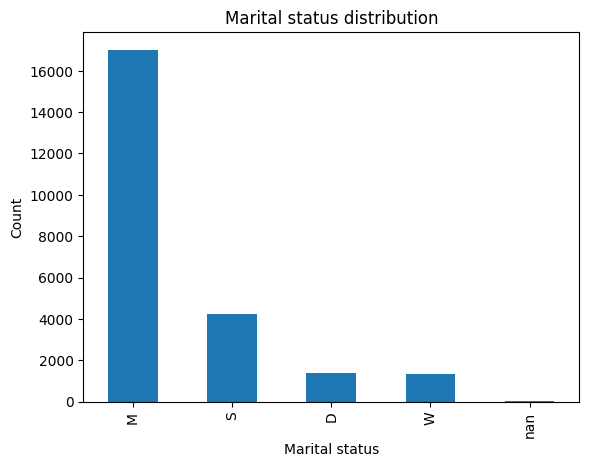

In [24]:
df["MARITAL_STATUS"].value_counts(dropna=False).plot(kind="bar", title="Marital status distribution", xlabel="Marital status", ylabel="Count")

<Axes: title={'center': 'Education distribution'}, xlabel='Education', ylabel='Count'>

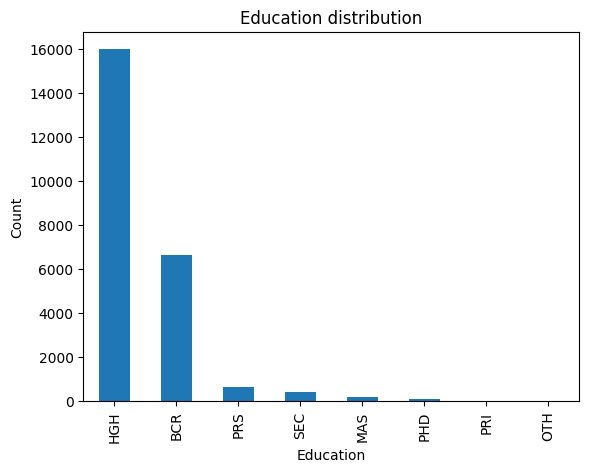

In [25]:
df["EDUCATION"].value_counts().plot(kind="bar", title="Education distribution", xlabel="Education", ylabel="Count")

<Axes: title={'center': 'Employment distribution'}, xlabel='Employment', ylabel='Count'>

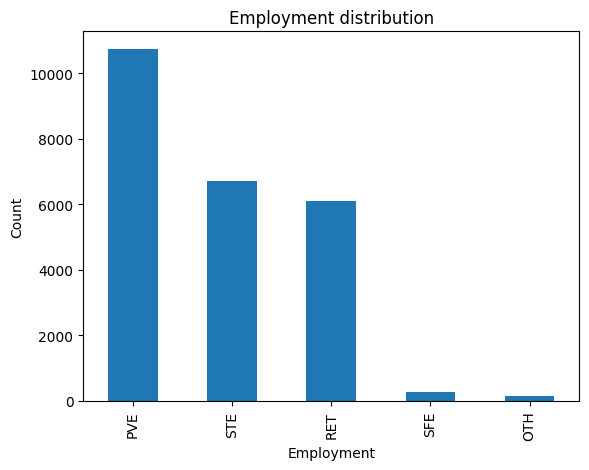

In [26]:
df["EMPLOYMENT"].value_counts().plot(kind="bar", title="Employment distribution", xlabel="Employment", ylabel="Count")

<Axes: title={'center': 'Gender distribution'}, xlabel='Genders', ylabel='Count'>

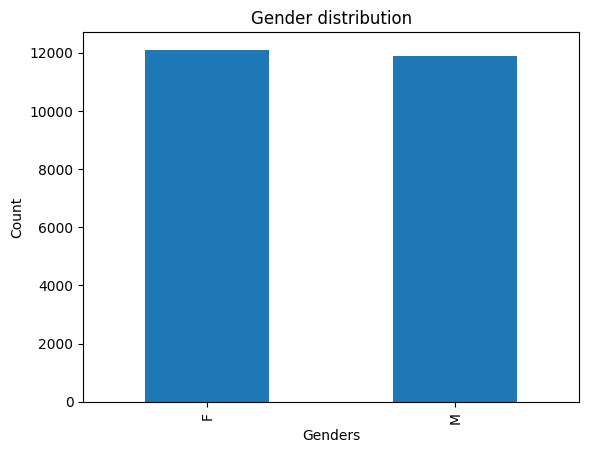

In [27]:
df["GENDER"].value_counts().plot(kind="bar", title="Gender distribution", xlabel="Genders", ylabel="Count")

<Axes: title={'center': 'Income distribution'}, xlabel='Income (EUR/month)', ylabel='Count'>

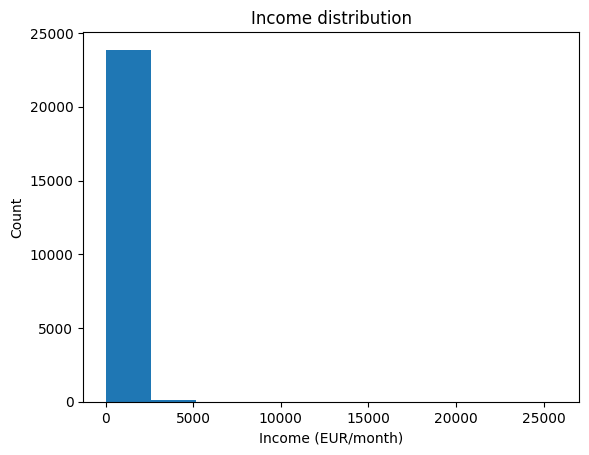

In [28]:
df["INCOME"].plot(kind="hist", title="Income distribution", xlabel="Income (EUR/month)", ylabel="Count")

<Axes: title={'center': 'Address date distribution'}, xlabel='Address date', ylabel='Count'>

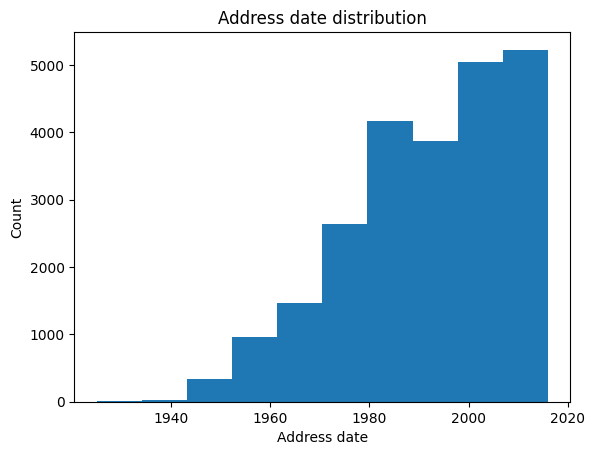

In [29]:
df["ADDRESS_DATE"].dt.year.plot(kind="hist", title="Address date distribution", xlabel="Address date", ylabel="Count")

<Axes: title={'center': 'Job date distribution'}, xlabel='Job date', ylabel='Count'>

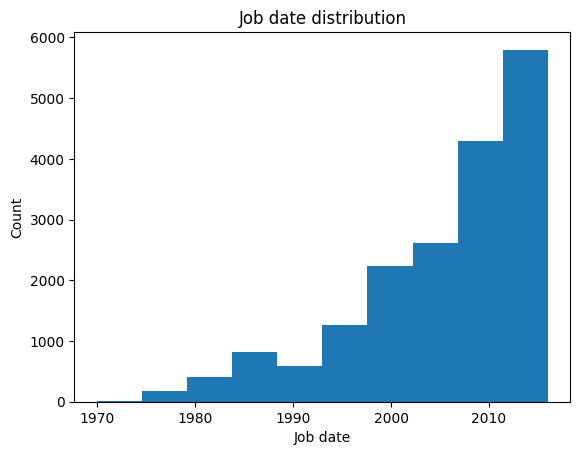

In [30]:
df["JOB_DATE"].dt.year.plot(kind="hist", title="Job date distribution", xlabel="Job date", ylabel="Count")

<Axes: title={'center': 'With bank date distribution'}, xlabel='With bank date', ylabel='Count'>

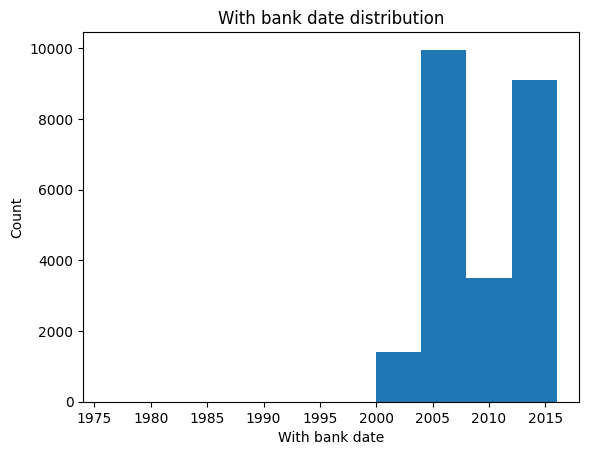

In [31]:
df["WITH_BANK_DATE"].dt.year.plot(kind="hist", title="With bank date distribution", xlabel="With bank date", ylabel="Count")

<Axes: title={'center': 'Balance distribution'}, xlabel='Balance (EUR)', ylabel='Count'>

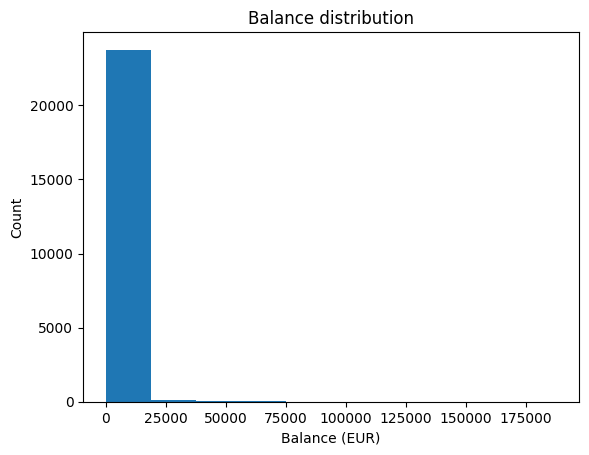

In [32]:
df["BALANCE"].plot(kind="hist", title="Balance distribution", xlabel="Balance (EUR)", ylabel="Count")

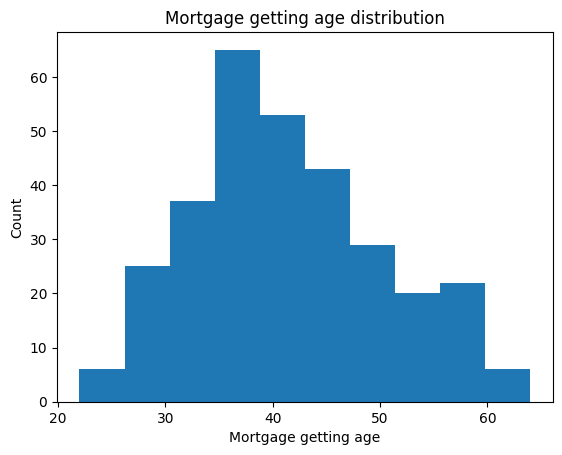

In [33]:
if data_path == RETAIL:
    df["MORTGAGE_GETTING_AGE"].plot(kind="hist", title="Mortgage getting age distribution", xlabel="Mortgage getting age", ylabel="Count")

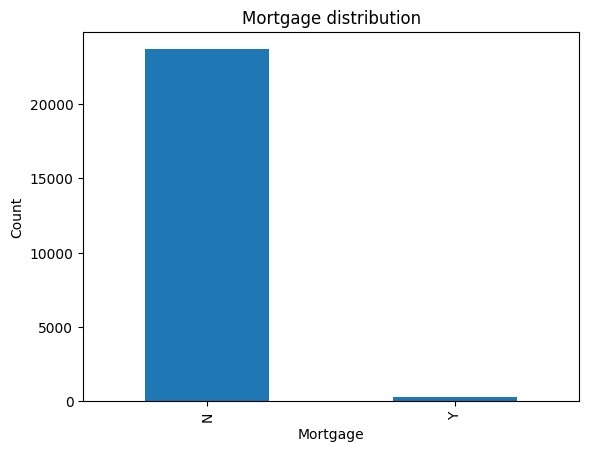

In [34]:
if data_path == RETAIL:
    df["MORTGAGE"].value_counts(dropna=False).plot(kind="bar", title="Mortgage distribution", xlabel="Mortgage", ylabel="Count")

### Saving the cleaned data

In [35]:
save_path = data_path.replace("raw", "processed/clean")
save_dir = os.path.dirname(save_path)

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

df.to_csv(save_path, index=False, sep=";")